In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder


In [2]:
df=pd.read_csv("Supermarket Sales Cleaned.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     972 non-null    object 
 1   Customer type  972 non-null    object 
 2   Gender         972 non-null    object 
 3   Product line   972 non-null    object 
 4   Unit price     972 non-null    float64
 5   Quantity       972 non-null    int64  
 6   Tax 5%         972 non-null    float64
 7   Total          972 non-null    float64
 8   Date           972 non-null    object 
 9   Time           972 non-null    object 
 10  Payment        972 non-null    object 
 11  Rating         972 non-null    float64
 12  City           972 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 98.8+ KB


In [4]:
col_num=df.select_dtypes(['float64'])
col_num

,Unit price,Tax 5%,Total,Rating
0,74.69,26.14,548.97,9.1
1,15.28,3.82,80.22,9.6
2,46.33,16.22,340.53,7.4
3,58.22,23.29,489.05,8.4
4,86.31,30.21,634.38,5.3
...,...,...,...,...
967,40.35,2.02,42.37,6.2
968,97.38,48.69,1022.49,4.4
969,31.84,1.59,33.43,7.7
970,65.82,3.29,69.11,4.1


In [5]:
col_obj=df.select_dtypes(['object'])
col_obj


,Invoice ID,Customer type,Gender,Product line,Date,Time,Payment,City
0,750-67-8428,Normal,Male,Health and beauty,2019-01-05,13:08,Ewallet,Yangon
1,226-31-3081,Normal,Male,Electronic accessories,2019-03-08,10:29,Cash,Naypyitaw
2,631-41-3108,Normal,Male,Home and lifestyle,2019-03-03,13:23,Credit card,Yangon
3,123-19-1176,Normal,Male,Health and beauty,2019-01-27,20:30,Ewallet,Yangon
4,373-73-7910,Normal,Male,Sports and travel,2019-02-08,10:37,Ewallet,Yangon
...,...,...,...,...,...,...,...,...
967,233-67-5758,Normal,Male,Health and beauty,2019-01-29,13:46,Ewallet,Naypyitaw
968,303-96-2227,Normal,Female,Home and lifestyle,2019-03-02,17:16,Ewallet,Mandalay
969,727-02-1313,Member,Male,Food and beverages,2019-02-09,13:22,Cash,Yangon
970,347-56-2442,Normal,Male,Home and lifestyle,2019-02-22,15:33,Cash,Yangon


In [6]:
col_obj['Time']=pd.to_datetime(col_obj['Time'])
col_obj['Time']=col_obj['Time'].dt.hour



In [7]:
def time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [8]:
col_obj['Time'] = col_obj['Time'].apply(time)

In [9]:
col_obj['Time'] 

0      Afternoon
1        Morning
2      Afternoon
3        Evening
4        Morning
         ...    
967    Afternoon
968      Evening
969    Afternoon
970    Afternoon
971    Afternoon
Name: Time, Length: 972, dtype: object

In [10]:
col_obj['Date']=pd.to_datetime(col_obj['Date'])


In [11]:
col_obj['Date']=col_obj['Date'].dt.month


In [12]:
col_obj['Date']

0      1
1      3
2      3
3      1
4      2
      ..
967    1
968    3
969    2
970    2
971    2
Name: Date, Length: 972, dtype: int64

In [13]:
col_obj['Date'].unique()

array([1, 3, 2], dtype=int64)

In [14]:
col_obj.drop(columns=['Invoice ID'],inplace=True)

In [15]:
col_obj_cat=pd.get_dummies(col_obj)
col_obj_cat

,Date,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Time_Afternoon,Time_Evening,Time_Morning,Payment_Cash,Payment_Credit card,Payment_Ewallet,City_Mandalay,City_Naypyitaw,City_Yangon
0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
1,3,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,3,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
4,2,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
968,3,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0
969,2,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
970,2,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1


In [16]:
df_cleaned=pd.concat([col_obj_cat,col_num], axis=1)


In [17]:
df_cleaned

,Date,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,...,Payment_Cash,Payment_Credit card,Payment_Ewallet,City_Mandalay,City_Naypyitaw,City_Yangon,Unit price,Tax 5%,Total,Rating
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,74.69,26.14,548.97,9.1
1,3,0,1,0,1,1,0,0,0,0,...,1,0,0,0,1,0,15.28,3.82,80.22,9.6
2,3,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,46.33,16.22,340.53,7.4
3,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,58.22,23.29,489.05,8.4
4,2,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,1,86.31,30.21,634.38,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,1,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,40.35,2.02,42.37,6.2
968,3,0,1,1,0,0,0,0,0,1,...,0,0,1,1,0,0,97.38,48.69,1022.49,4.4
969,2,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,31.84,1.59,33.43,7.7
970,2,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,1,65.82,3.29,69.11,4.1


In [18]:
y=df_cleaned['Total']
x=df_cleaned.drop(columns=['Total','Tax 5%'])

In [19]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.2)


#### Linear Regression

In [20]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [21]:
y_pred1=lr.predict(X_test)

In [22]:
lr.coef_


array([ -3.39709704,   0.31621671,  -0.31621671,  15.41440134,
       -15.41440134,  19.16262514, -40.429556  ,  -3.96025679,
         6.5436234 ,   4.55751704,  14.12604722,  10.11381182,
         5.11064424, -15.22445606,  -3.67269342,   9.03726535,
        -5.36457193,   0.8487067 ,   6.01622333,  -6.86493002,
         5.69274301,  -4.88820456])

In [23]:
lr.intercept_


39.19877592466122

#### Decision Tree Regression

In [24]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [25]:
y_pred2=dt.predict(X_test)


#### KNeighbors Regressor

In [26]:
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [27]:
y_pred3=knn.predict(X_test)


#### Mean Absolute Errors

In [29]:
mae_lr=mean_absolute_error(Y_test, y_pred1)
mae_dt=mean_absolute_error(Y_test, y_pred2)
mae_knn=mean_absolute_error(Y_test, y_pred3)

### Mean Squared Error

In [ ]:
mse_lr=mean_squared_error(Y_test, y_pred1)
mse_dt=mean_squared_error(Y_test, y_pred2)
mse_knn=mean_squared_error(Y_test, y_pred3)

#### Root Mean Squared Error (RMSE)

In [33]:
r2_lr = r2_score(Y_test, y_pred1)
r2_dt = r2_score(Y_test, y_pred2)
r2_knn = r2_score(Y_test, y_pred3)

In [34]:
# Linear Regression Performance
print("Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}\n")

# Decision Tree Performance
print("Decision Tree Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R² Score: {r2_dt:.2f}\n")

# KNeighbors Regressor Performance
print("KNeighbors Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")


Linear Regression Performance:
Mean Absolute Error (MAE): 151.77
Mean Squared Error (MSE): 36805.19
R² Score: 0.42

Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 196.23
Mean Squared Error (MSE): 71321.66
R² Score: -0.13

KNeighbors Regressor Performance:
Mean Absolute Error (MAE): 155.04
Mean Squared Error (MSE): 42744.38
R² Score: 0.33


##### Mean Squared Error (MSE) is computed for each model: the lower, the better.
##### Mean Absolute Error (MAE) is also calculated: again, lower values indicate better models.
##### R² shows how well the model fits the data: higher values are better.
#### The model with the lowest MSE is considered the best in this code. You can also compare other metrics like R² to verify.

In [36]:
models = ['Linear Regression', 'Decision Tree', 'K-Neighbors']
mse_values = [mse_lr, mse_dt, mse_knn]
best_model_index = mse_values.index(min(mse_values)) 

print(f"\nBest Model based on MSE: {models[best_model_index]}")


Best Model based on MSE: Linear Regression


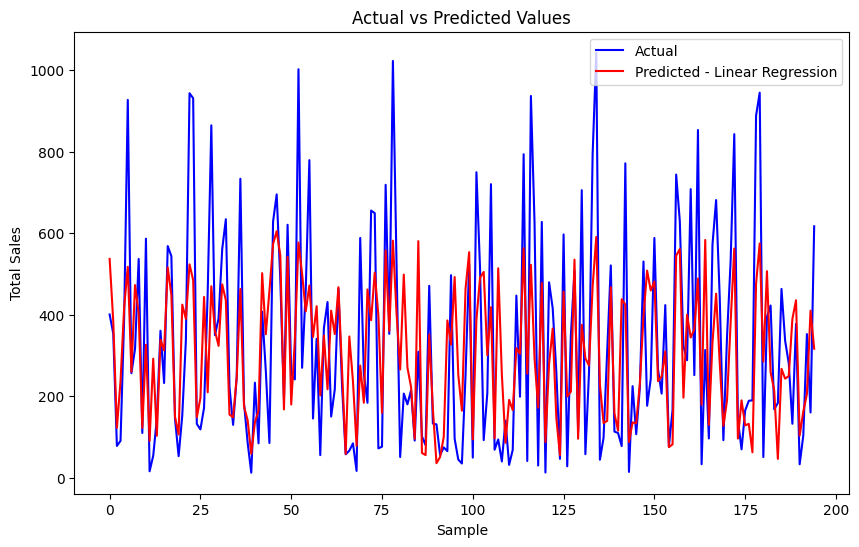

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Actual vs Predicted for one model
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual', color='blue')
plt.plot(y_pred1, label='Predicted - Linear Regression', color='red')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Total Sales')
plt.show()


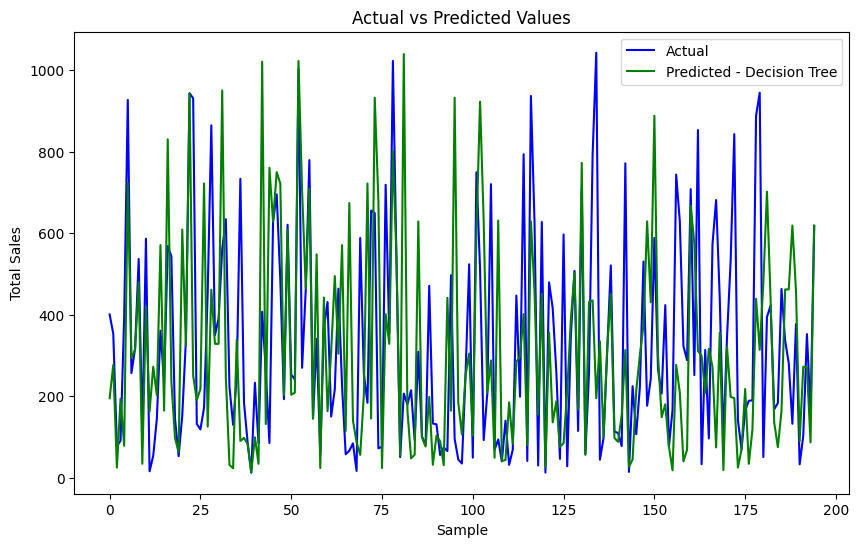

In [46]:

# Plot Actual vs Predicted for one model
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual', color='blue')
plt.plot(y_pred2, label='Predicted - Decision Tree', color='green')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Total Sales')
plt.show()

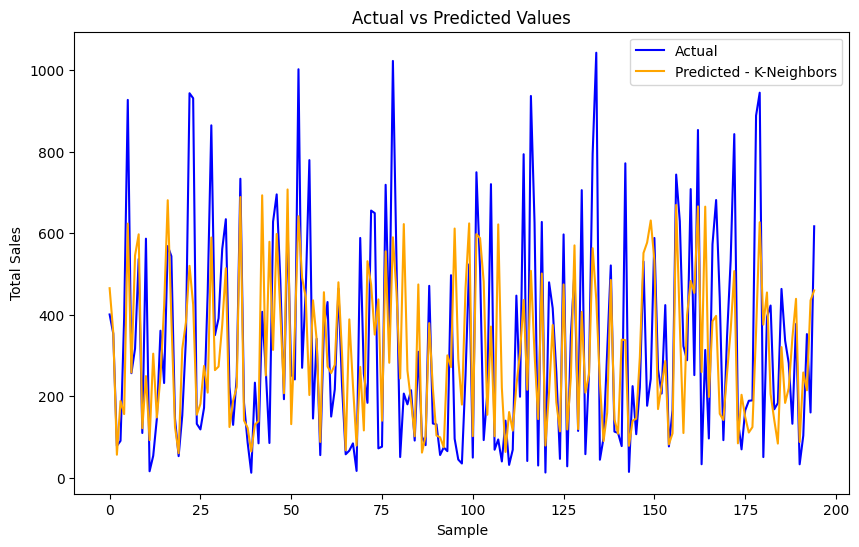

In [47]:

# Plot Actual vs Predicted for one model
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label='Actual', color='blue')
plt.plot(y_pred3, label='Predicted - K-Neighbors', color='orange')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample')
plt.ylabel('Total Sales')
plt.show()